In [1]:
from os import listdir
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras import layers
from keras.models import Sequential
from livelossplot import PlotLossesKeras

In [2]:
images_dir = 'dataset/train_data'
file_names = listdir(images_dir)
sample_count = len(file_names)
print(sample_count)

800


In [3]:
images_test_dir = 'dataset/real_data'
file_test_names = listdir(images_test_dir)
test_count = len(file_test_names)
print(test_count)

10


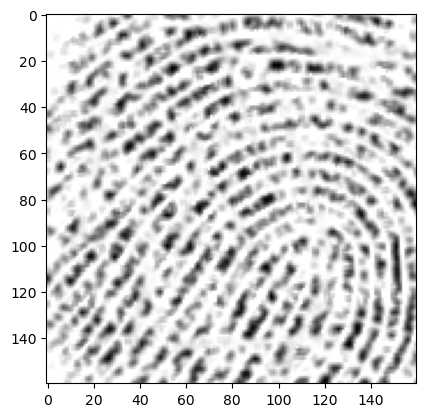

In [4]:
first_image = cv2.imread(images_dir + '/' + file_names[0], cv2.IMREAD_GRAYSCALE)
plt.imshow(first_image, cmap='gray')
height, width = first_image.shape
plt.show()

In [5]:
depth = 1
X = np.zeros((sample_count, width, height, depth))
y = np.zeros((sample_count, 1), dtype=int)
for index, file_name in enumerate(file_names):
    full_path = images_dir + '/' + file_name
    file_label_text, file_number_and_ext = file_name.split('_')
    image = cv2.imread(full_path, cv2.IMREAD_GRAYSCALE)
    label = int(file_label_text)
    X[index] = np.reshape(image, (width, height, depth))
    y[index] = label

In [6]:
X_test = np.zeros((test_count, width, height, depth))
for index, file_name in enumerate(file_test_names):
    full_path = images_test_dir + '/' + file_name
    file_label_text, file_ext = file_name.split('.')
    image = cv2.imread(full_path, cv2.IMREAD_GRAYSCALE)
    label = int(file_label_text)
    X_test[index] = np.reshape(image, (width, height, depth))

In [7]:
y_one_hot = np.zeros((sample_count, 10))
for index, label in enumerate(y):
    y_one_hot[index, label] = 1
print(y_one_hot)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [8]:
classifier = Sequential([
    layers.Conv2D(16, kernel_size=3, activation='relu', input_shape=(height, width, depth)),
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(32, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(256),
    layers.Dense(10, activation='sigmoid')
])
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.summary()

G:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 158, 158, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 79, 79, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 77, 77, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 38, 38, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 36, 36, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     5,308,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,334,538 (20.35 MB)

 Trainable params: 5,334,538 (20.35 MB)

 Non-trainable params: 0 (0.00 B)

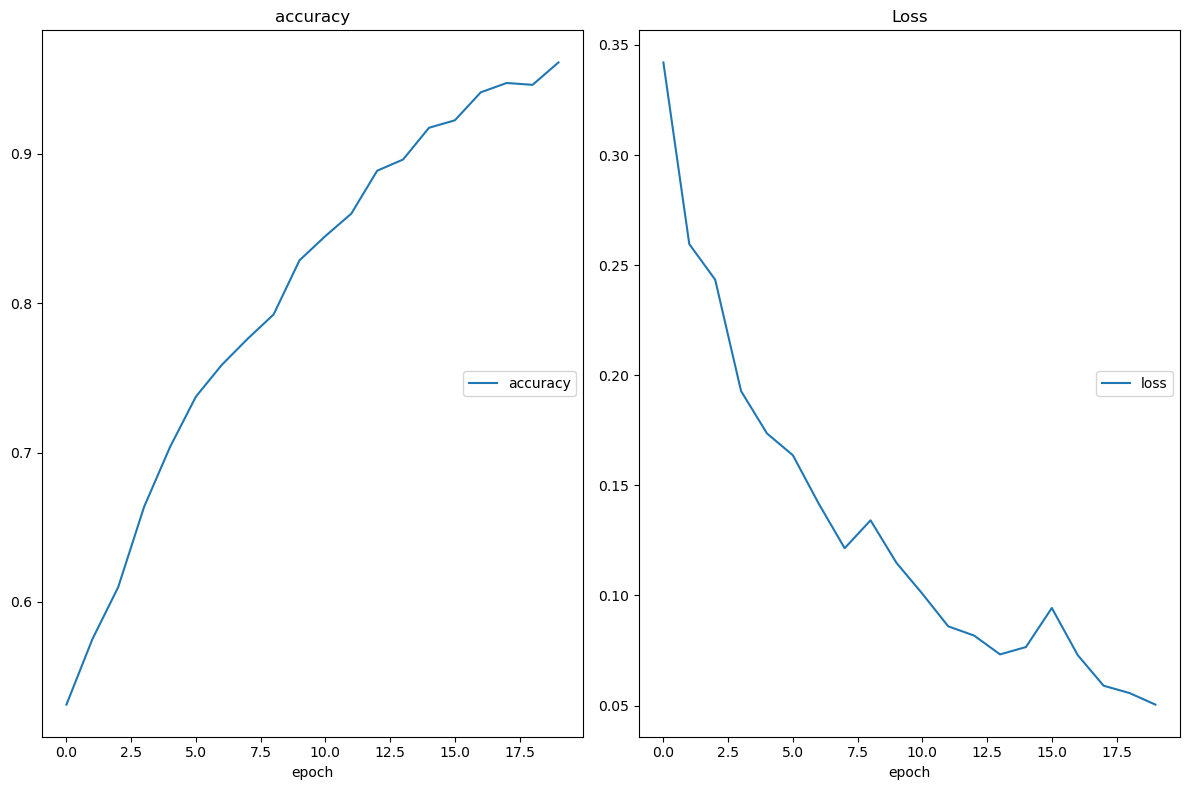

accuracy
	accuracy         	 (min:    0.531, max:    0.961, cur:    0.961)
Loss
	loss             	 (min:    0.050, max:    0.342, cur:    0.050)
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 314ms/step - accuracy: 0.9573 - loss: 0.0514
CPU times: total: 3min 15s
Wall time: 46.2 s


In [12]:
%%time
classifier.fit(X, y_one_hot, verbose=1, batch_size=128, epochs=20, callbacks=[PlotLossesKeras()])

In [10]:
y_test = classifier.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


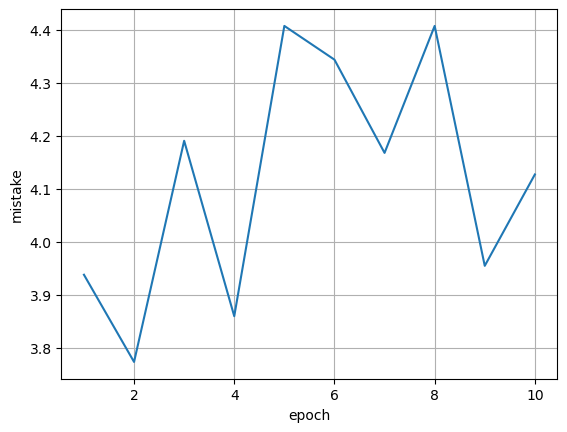

In [11]:
mat = np.matrix(y_test)
sums = mat.sum(axis=1)

fig, ax = plt.subplots()
ax.plot(np.arange(1, len(sums) + 1), sums,)
ax.set_xlabel('epoch')
ax.set_ylabel('mistake')
ax.grid(True)